In [1]:
import pandas as pd
import numpy as np
import os


movies = pd.read_csv('/kaggle/input/movie-lens-small-latest-dataset/movies.csv')
ratings = pd.read_csv('/kaggle/input/movie-lens-small-latest-dataset/ratings.csv')

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
final_dataset_1 = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset_1.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
final_dataset_1.fillna(0, inplace=True)
final_dataset_1.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
no_users_voted = ratings.groupby('movieId')['rating'].count()
no_movies_voted = ratings.groupby('userId')['rating'].count()

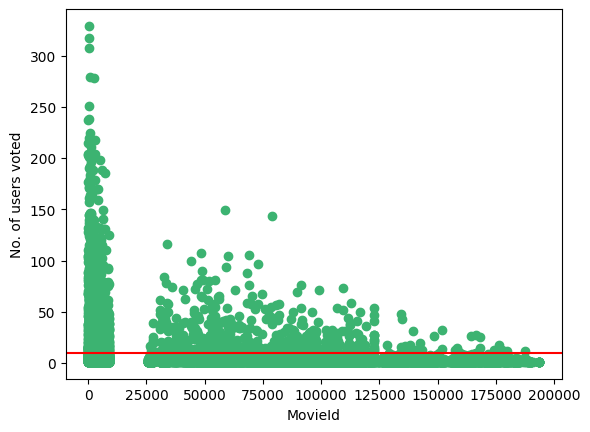

In [7]:
import matplotlib.pyplot as plt
plt.scatter(no_users_voted.index,no_users_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [19]:
final_dataset_1 = final_dataset_1.loc[no_users_voted[no_users_voted > 10].index,:]

In [20]:
final_dataset_1 = final_dataset_1.loc[:, no_movies_voted[no_movies_voted > 50].index]

In [21]:
final_dataset_1

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from scipy.sparse import csr_matrix
# compressed sparse row
csr_data = csr_matrix(final_dataset_1.values)
final_dataset_1.reset_index(inplace=True)
# resetting the index of userid here instead of row it becomes another column

In [23]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [24]:
csr_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 72893 stored elements and shape (2121, 378)>

In [25]:
# def get_movie_recommendation(movie_name):
#     n_movies_to_reccomend = 10
#     movie_list = movies[movies['title'].str.contains(movie_name)]  
#     if len(movie_list):        
#         movie_idx= movie_list.iloc[0]['movieId']
#         movie_idx = final_dataset_1[final_dataset_1['movieId'] == movie_idx].index[0]
#         distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
#         rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
#         recommend_frame = []
#         for val in rec_movie_indices:
#             movie_idx = final_dataset_1.iloc[val[0]]['movieId']
#             idx = movies[movies['movieId'] == movie_idx].index
#             recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
#         df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
#         return df
#     else:
#         return "No movies found. Please check your input"

def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name, case=False)]  # case insensitive
    if len(movie_list):        
        movie_id = movie_list.iloc[0]['movieId']

        # Find index in final_dataset_1
        movie_idx = final_dataset_1[final_dataset_1['movieId'] == movie_id].index[0]

        # Get nearest neighbors (KNN includes the movie itself as the 1st neighbor)
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_reccomend + 1)

        # Exclude the movie itself and sort by similarity (lowest distance)
        rec_movie_indices = sorted(
            list(zip(indices.squeeze().tolist()[1:], distances.squeeze().tolist()[1:])),  # skip index 0
            key=lambda x: x[1]
        )

        # Prepare recommendations
        recommend_frame = []
        for val in rec_movie_indices:
            similar_movie_id = final_dataset_1.iloc[val[0]]['movieId']
            title = movies[movies['movieId'] == similar_movie_id]['title'].values[0]
            recommend_frame.append({'Title': title, 'Distance': val[1]})

        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_reccomend + 1))
        return df

    else:
        return "No movies found. Please check your input"


In [26]:
get_movie_recommendation('Iron Man')


,Title,Distance
1,"Avengers, The (2012)",0.285319
2,"Dark Knight, The (2008)",0.285835
3,WALL·E (2008),0.298138
4,Iron Man 2 (2010),0.307492
5,Avatar (2009),0.310893
6,Batman Begins (2005),0.362759
7,Star Trek (2009),0.366029
8,Watchmen (2009),0.368558
9,Guardians of the Galaxy (2014),0.368758
10,Up (2009),0.368857


In [12]:
R = ratings.pivot(index='movieId',columns='userId',values='rating')

In [13]:
R.fillna(0, inplace=True)
R.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#svd implementation
from scipy.sparse.linalg import svds
import numpy as np

# Assume R is a movie × user matrix with movieId as index
R_matrix = R.values
R_mean = np.mean(R_matrix, axis=1).reshape(-1, 1)
R_demeaned = R_matrix - R_mean

# Apply SVD
#latent features also in consideration
U, sigma, VT = svds(R_demeaned, k=50)
sigma = np.diag(sigma)

# Compute latent movie features
movie_features = np.dot(U, sigma)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def get_movie_recommendation_svd(movie_name, movies, final_dataset_1, movie_features, R, n_recommendations=10):
    # Step 1: Match movie title
    movie_list = movies[movies['title'].str.contains(movie_name, case=False, regex=False)]  
    if movie_list.empty:
        return "No movies found. Please check your input"

    # Step 2: Get movieId and find index in R
    movie_id = movie_list.iloc[0]['movieId']

    if movie_id not in R.index:
        return f"Movie '{movie_name}' exists but not found in ratings matrix."

    movie_idx = R.index.get_loc(movie_id)

    # Step 3: Compute cosine similarity from latent features
    movie_vector = movie_features[movie_idx].reshape(1, -1)
    similarity_scores = cosine_similarity(movie_vector, movie_features).flatten()

    # Step 4: Get top similar movies (excluding itself)
    similar_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]

    recommend_frame = []
    for idx in similar_indices:
        sim_movie_id = R.index[idx]
        movie_row = movies[movies['movieId'] == sim_movie_id]
        if not movie_row.empty:
            recommend_frame.append({
                'Title': movie_row.iloc[0]['title'],
                'Similarity': similarity_scores[idx]
            })

    return pd.DataFrame(recommend_frame, index=range(1, n_recommendations + 1))

In [28]:
get_movie_recommendation_svd(
    movie_name="Iron Man",
    movies=movies,
    final_dataset_1=final_dataset_1,
    movie_features=movie_features,
    R=R,
    n_recommendations=10
)

,Title,Similarity
1,WALL·E (2008),0.891437
2,Avatar (2009),0.887909
3,Star Trek (2009),0.883988
4,Sherlock Holmes (2009),0.858885
5,District 9 (2009),0.857971
6,Up (2009),0.849528
7,"Dark Knight, The (2008)",0.842004
8,"Avengers, The (2012)",0.836555
9,Kung Fu Panda (2008),0.827870
10,"Bourne Ultimatum, The (2007)",0.814532
